# Case Study 2: BellaBeat

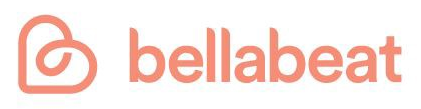

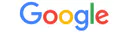

## 1. Case Overview & Summary

This case study is part of the Capstone Project for the Google Data Analytics Professional Certificate.

BellaBeat was founded in 2013 as a women's health and fitness technology company. Their products are made for women to provide better tracking-technologies for health, wellness and fitness. BellaBeat consumers can use the information they record while using the apps and devices to assist in providing and advocating for overall better health.

## 2. Ask: Business Task

The owner of the company, Urška Sršen, wants an analysis of consumer trends to identify potential growth strategies. This will be done by analyzing smart device usage data from the BellaBeat tracker devices.

The case study links to a dataset from FitBit Fitness Tracker Data, a data set of 30 FitBit users fitness tracker data. This dataset can be used to compare industry trends and what users of competitive technologies use their products for. This can be compared to the data from BellaBeat's product to determine the best growth opportunities.

Stakeholders:

\- Urška Sršen - Bellabeat co-founder and Chief Creative Officer

\- Sando Mur - BellaBeat co- founder and key member of Bellabeat executive team

\- Bellabeat Marketing Analytics team

## 3. Prepare: Data Integrity

### 3.1 Data set used:

The dataset used during the analysis can be found on Kaggle through the user Mobius, [(https://www.kaggle.com/datasets/arashnic/fitbit](http://))

### 3.2 Accessibility and Data Privacy:

The data is identified as open-source and has a usability rating of 10.00 identified by Kaggle, meaning there is a high level of documentation. The dataset is published under the CC0: Public Domain license. This data can be used freely for our analysis without asking for permission.

### 3.3 Dataset Information, Verification and Organization

The dataset downloads as a .zip file. Once unzipped, there are 18 .csv files. The following shows us metadata about the unzipped csv files:

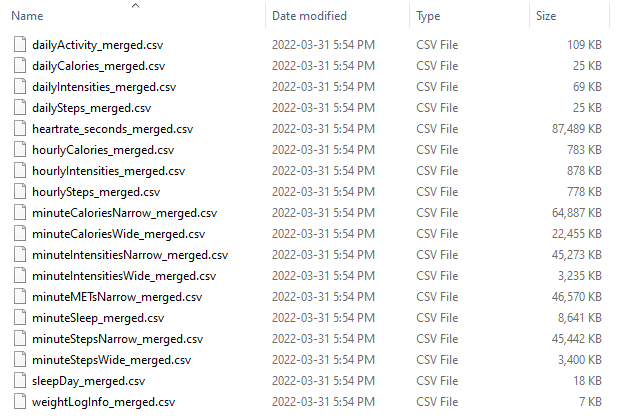

### 3.4 Data Limitations

The sample size provided by the 30 FitBit users is small and there is no data containing demographics and other factors that can give us a larger scale picture. Additionally, the data covers a limited period of time from a survey taken March - May 2016, so this may be out of date and more current data will be needed.

## 4. Process: Data Cleaning & Manipulation

### 4.1 Cleaning

I will be using Microsoft SQL Server Management Studio to run SQL queries on the files under new tables, which I will then consolidate into one final table and create a new file with the cleaned data for analysis using R.

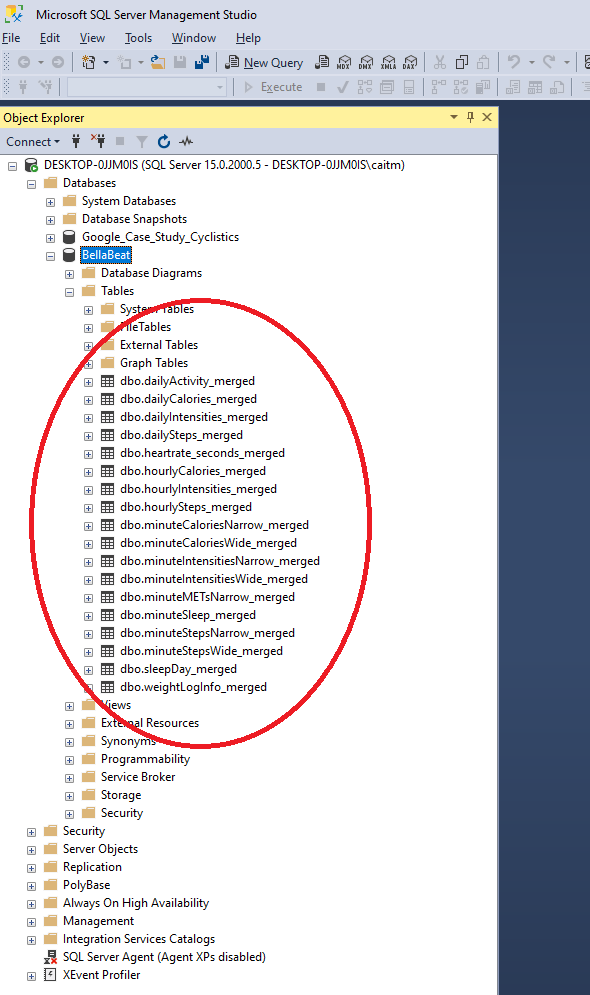

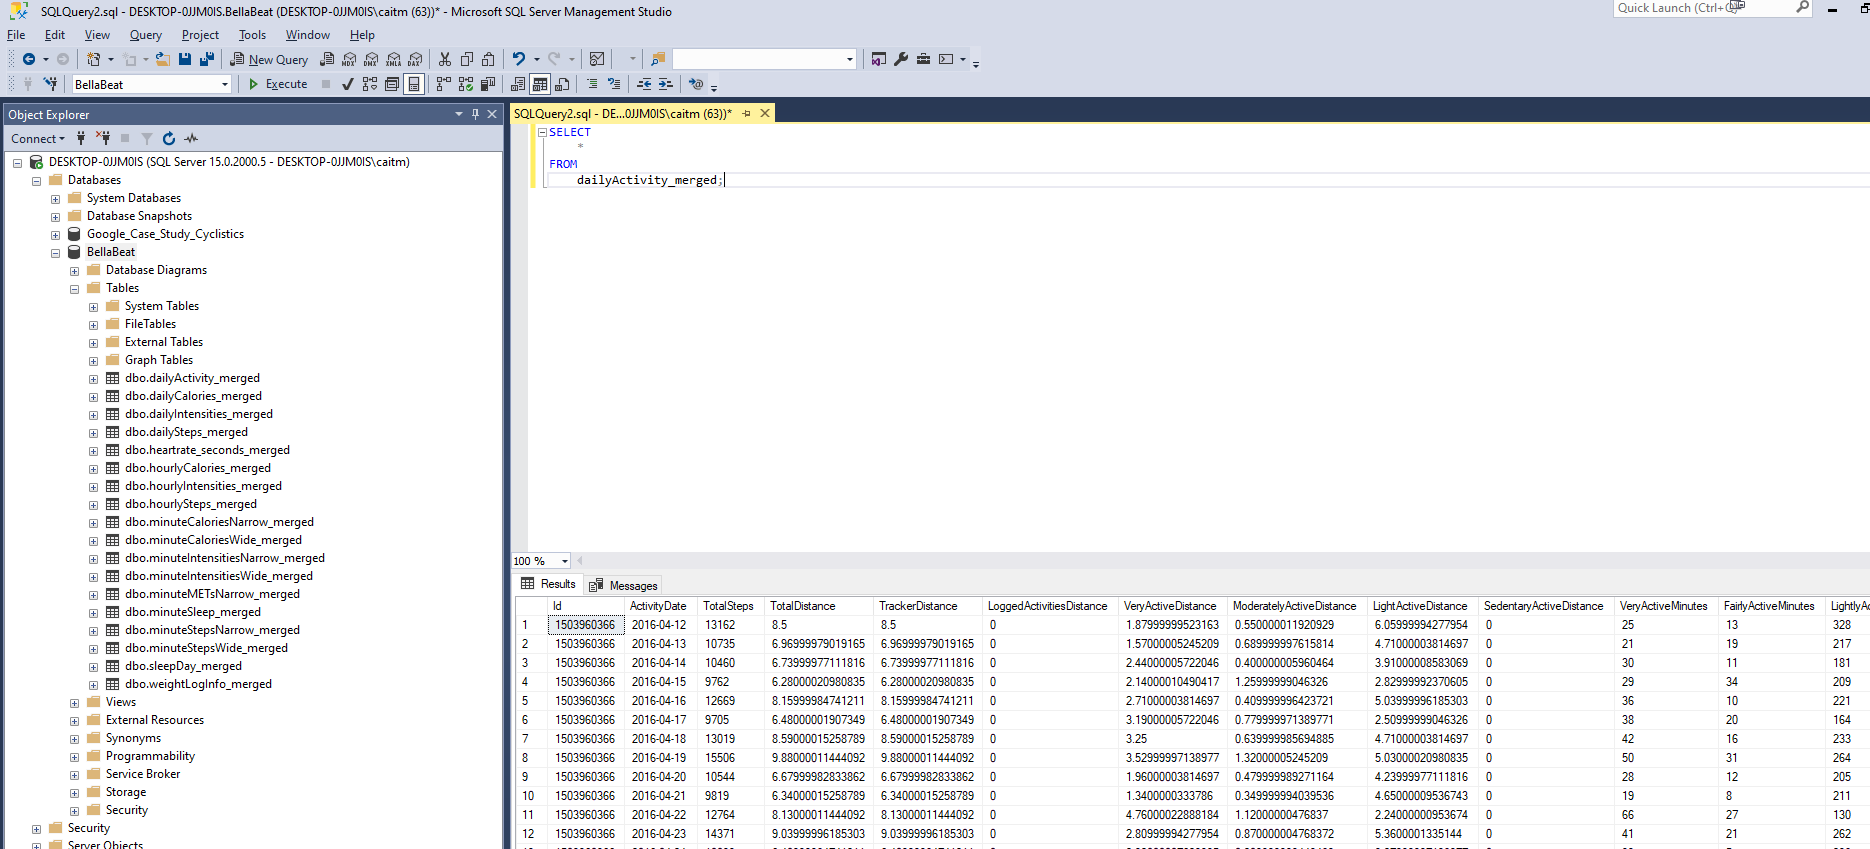

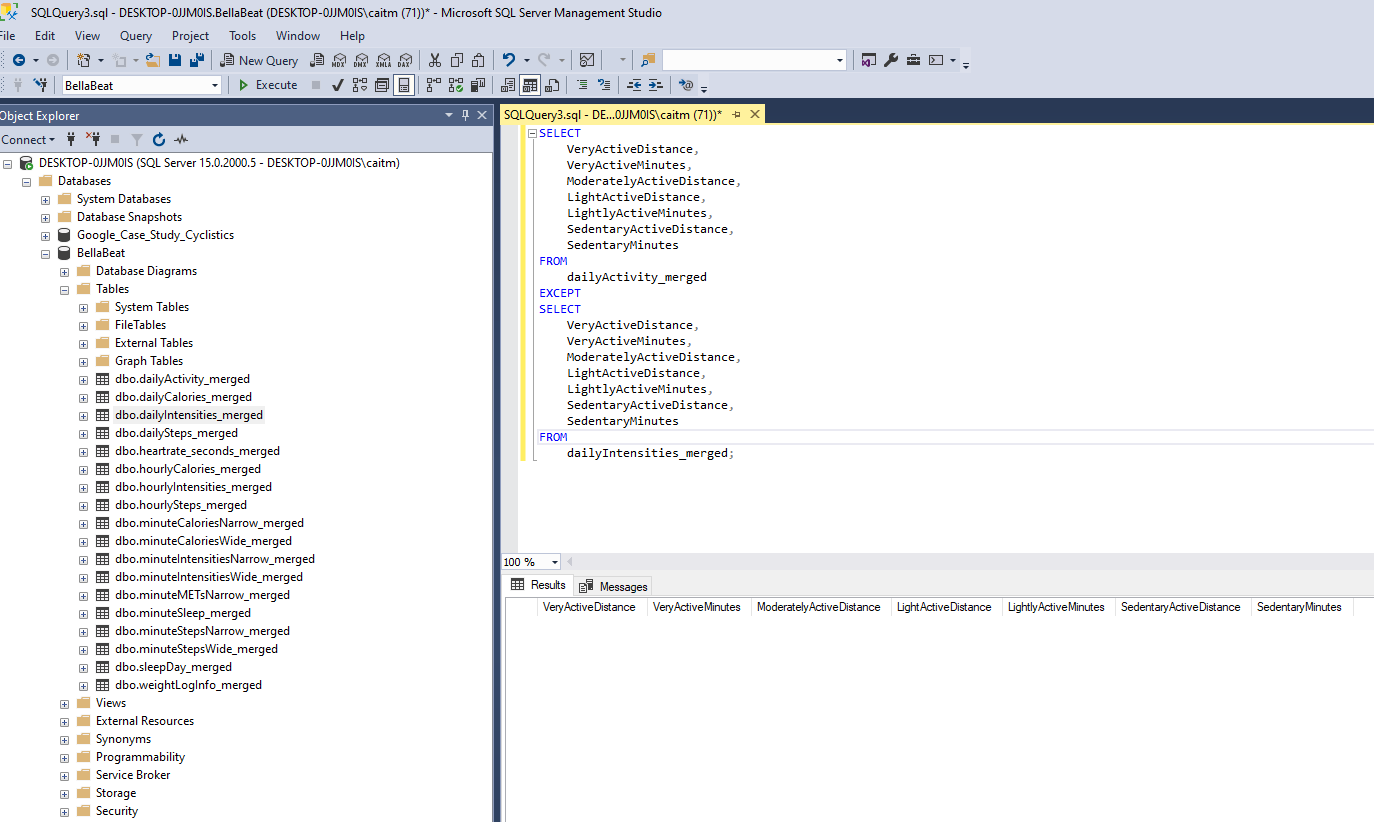

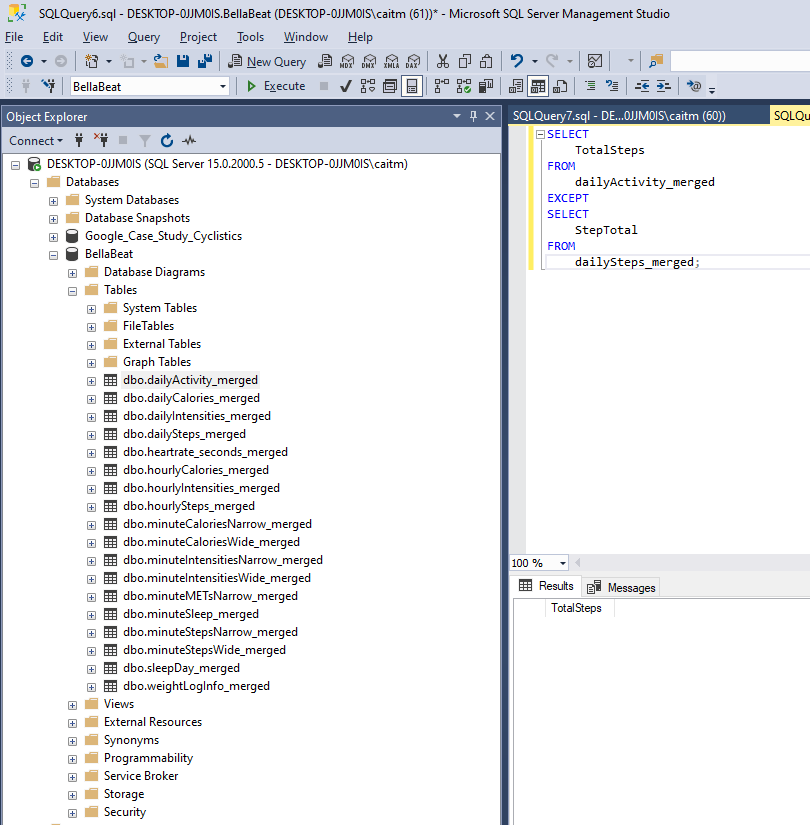

## 5. Analyze: Data Analysis

Now that the files have been cleaned, it is time to analyze the data. I have chosen to use R, with RStudio.

### 5.1 Load Library Packages in RStudio


In [1]:
library(tidyverse)
library(tidyr)
library(lubridate)
library(ggplot2)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 5.2 Condense Column Names to be used in R Script

Thinking back to the business task, we want to find trends with users of the competitive FitBit trackers. There are *five* datasets I will focus on for my analysis:

1.  dailyActivity_merged
2.  dailyCalories_merged
3.  dailyIntensities_merged
4.  dailySteps_merged
5.  SleepDay_merged

Now, I will clean the data frame names, check the structure and do a preview of the data to scan for any issues. This is involved in data cleaning, but this will also help the analysis run more smoothly by referencing shorter names in my code. 

In [2]:
daily_act <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
daily_cal <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')

In [4]:
daily_int <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')

In [5]:
daily_steps <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')

In [6]:
daily_sleep <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [7]:
str(daily_act)
head(daily_act)

str(daily_cal)
head(daily_cal)

str(daily_int)
head(daily_int)

str(daily_steps)
head(daily_steps)

str(daily_sleep)
head(daily_sleep)

spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


'data.frame':	940 obs. of  10 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ StepTotal  : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


### 5.3 Plotting Daily Data Insights

Using the Tidyverse function *ggplot*, I will create several charts with different data points found in the daily_activity_sleep table I created that houses all of the daily data records.

#### 5.3.1 Sleep by Total Steps, Daily

In [8]:
Total_Sleep <- merge(daily_act, daily_sleep, by="Id")

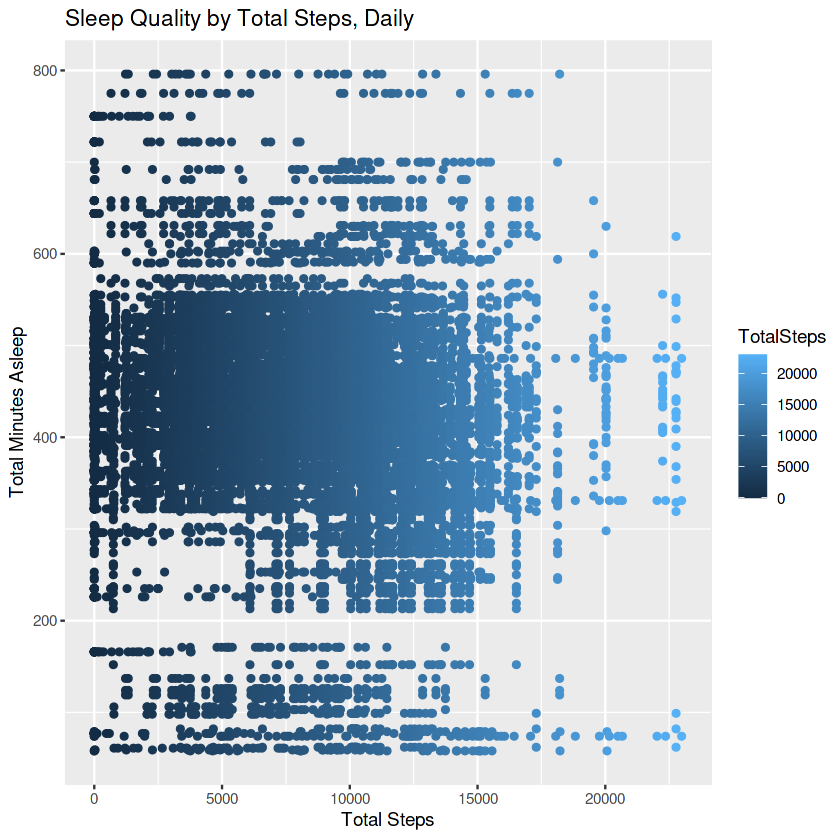

In [9]:
ggplot(data= Total_Sleep, mapping= aes(x= TotalSteps, y=TotalMinutesAsleep, color=TotalSteps)) +
    geom_point() +
    labs(title="Sleep Quality by Total Steps, Daily", x="Total Steps", y="Total Minutes Asleep")
    

This graph is showing us a concentration of data points around 400-600 minutes asleep, or 7-10 hours. The standard recommendation is 8 hours of sleep per night, so we can look for any trends with regards to steps and quality of sleep. Though more data would need to be collected from a larger group of users, this graph highlights a trend of better quality sleep beginning around the 5,000 step mark. This is inline with conventional wisdom around better exercise equating better sleep.

#### 5.3.2 Tracker Distance by Total Steps Taken, Daily

In [10]:
Total_Distance <- merge(daily_act, daily_steps, by="Id")

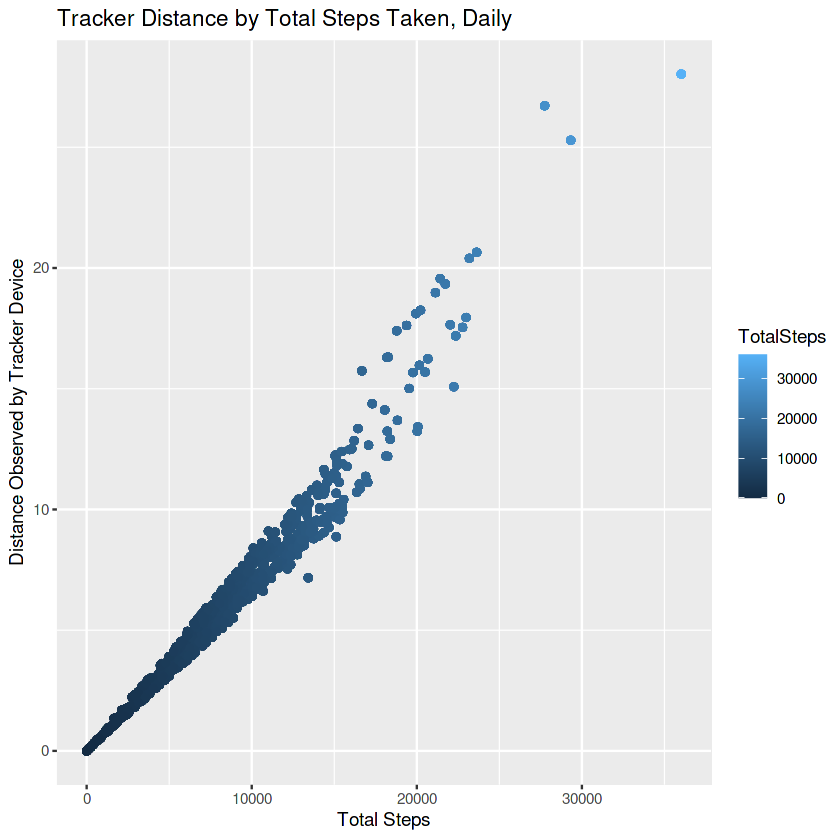

In [11]:
ggplot(data = Total_Distance) +
  geom_point (mapping= aes(x=TotalSteps, y=TrackerDistance, color= TotalSteps))+
  labs(title= "Tracker Distance by Total Steps Taken, Daily", x="Total Steps", y="Distance Observed by Tracker Device")

This graph is showing us that as distance increases, so do steps. It is important for users that want to increase their steps to recognize that distance is an important factor is achieving this goal. Distance incentives could be a growth opportunity, such as badges on the app or special offers for meeting weekly distance challenges.

#### 5.3.3 Calories Burned by Total Steps Taken, Daily

In [12]:
Total_Calories <- merge(daily_steps, daily_cal, by="Id")

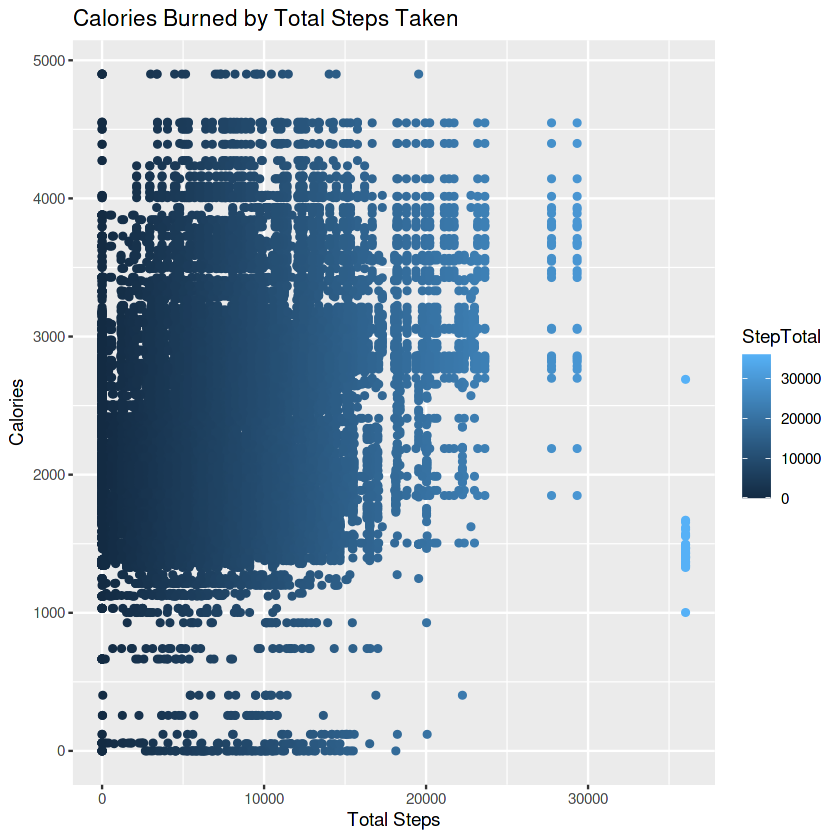

In [13]:
ggplot(data = Total_Calories) +
  geom_point (mapping= aes(x= StepTotal, y= Calories, color= StepTotal)) +
  labs(title= "Calories Burned by Total Steps Taken", x= "Total Steps", y="Calories")

Finally, this graph highlights total steps and calories burned which shows a positive correlation. We can conclude that as more steps are taken, more calories are burned. This means that users who are looking to increase steps will have the added benefit of burning more calories. This can also be focused on when devloping the app and tracker features, as users will focus on this area of their health related goals. We can see that on average, most users are reaching atleast 10,000 daily steps. Pushing for further calorie burn through activities done aside from step count can also be considered another marketing possibility. 

## 6. Share: Conclusions and Findings

Based on my findings, I would recommend that BellaBeat incorporate several changes to stay competitive with the industry trends presented by their competitor's data collected by users of the FitBit. My recommendations are as follows:

### 6.1 More ZZZ = Better Goal Progress

Relating back to our business task, we are looking for consumer trends to identify potential growth strategies. One key insight found through my analysis (Chart 5.3.1) suggests that sleep is an important factor in achieving daily step goals. This is an important potential growth strategy because BellaBeat can invest more into sleep analysis trackers and app updates to stay competitive. Marketing can be focused towards developing an understanding of why sleep will help the consumer achieve their goals and how BellaBeat's devices and apps can help them do just that.

### 6.2 Go the Distance for Your Health Goals

Chart 5.3.2 highlights the relationship between distance and total step count for the day. While this relationship is well known, we know that users are trying to increase their number of steps to reach the 10,000 steps a day that is recommended. Highlighting the importance of distance, or to create an incentive for distance challenges with badges and rewards on the app can be a potential growth opportunity for marketing and development.

### 6.3 Calories and Wishful Shrinking

We know that calories in and calories out is the way to maintain and monitor fat loss. Looking at Chart 5.3.3, we see that calories burned increases with more steps. Highlighting how steps can aid in weight loss and other benefits will show the consumer the importance of using this device to monitor their health. Incentives and badges for meeting calorie-burn benchmarks through the day could be another growth potential.

#### Analysis and Report Prepared by Caitlin Malloch for BellaBeat, March 2022.

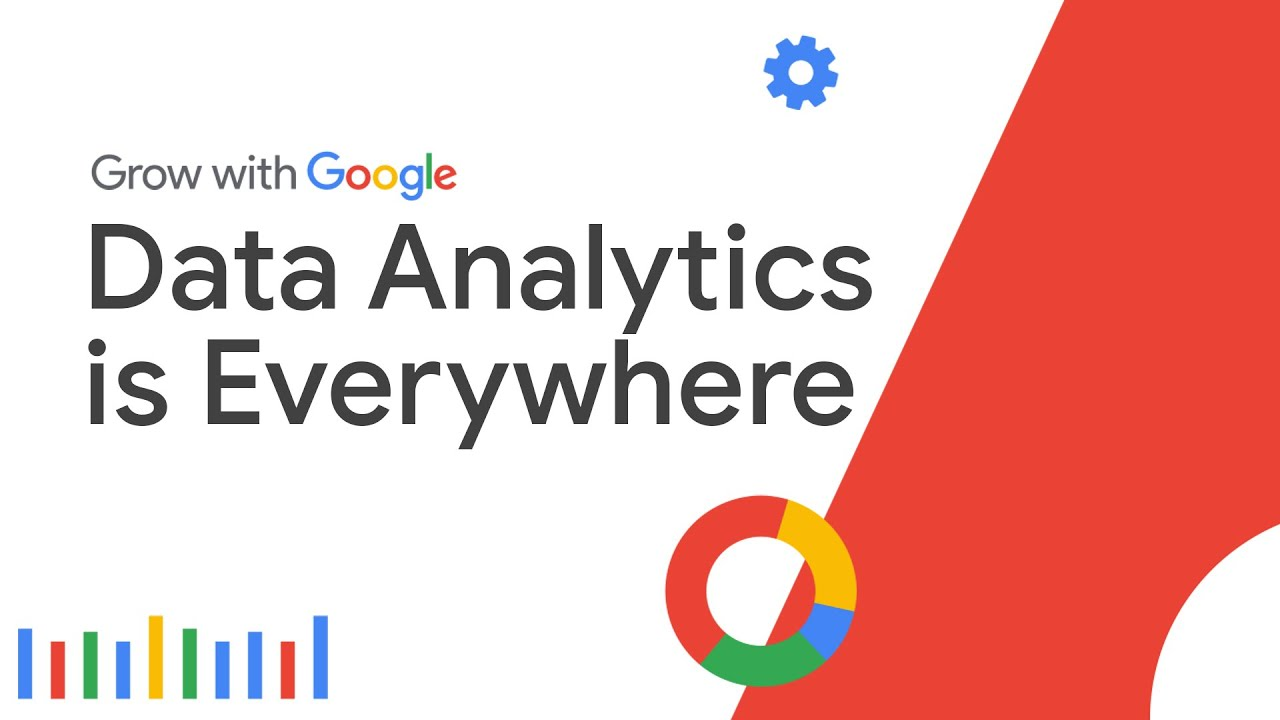